In [160]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt
import io
import requests
import matplotlib.collections as col
import matplotlib.patches as mpatches
import seaborn as sns
import math
import scipy.stats as stats
import sklearn
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.regressionplots import *
import statsmodels.api as sm
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")
from statsmodels.formula.api import ols

In [161]:
allPolls = pd.read_csv('all_polls.csv')

In [221]:
errorPolls = allPolls[['samplesize', 'error', 'bias', 'pollster', 'state', 'type_simple', 'partisan_race']]

In [165]:
#Removing some outliers
errorPolls = errorPolls[errorPolls['error'] < 90]
errorPolls.reset_index(drop = True, inplace = True)

In [166]:
#binData is going to be what we use to determine maximum error/bias for a given sample size.

In [299]:
binData = pd.DataFrame()

In [300]:
binData['samplesize'] = range(0, 7550, 50)

In [259]:
binData['error'] = 0
binData['pos_bias'] = 0
binData['neg_bias'] = 0
binData['pollster'] = ''
binData['type_simple'] = ''
binData['state'] = ''
binData['partisan_race'] = 0

In [261]:
#We're going to populate this with the maximum error/bias for each bin and then graph the result.

In [262]:
def errorPopulate():
    for entry in range(len(errorPolls)):
        currentError = errorPolls['error'][entry]
        #Round sample size to the nearest 50
        sampleSize = (errorPolls['samplesize'][entry] + (50 - errorPolls['samplesize'][entry]) % 50)
        #Make sure we don't go over
        if sampleSize in binData['samplesize'].values:
            if binData['error'][sampleSize/50] < currentError:
                binData['error'][sampleSize/50] = currentError
                binData['pollster'][sampleSize/50] = errorPolls['pollster'][entry]
                binData['type_simple'][sampleSize/50] = errorPolls['type_simple'][entry]
                binData['state'][sampleSize/50] = errorPolls['state'][entry]

In [263]:
def biasPopulate():
    #TODO: Get this to return max positive and negative bias
    for entry in range(len(errorPolls)):
        currentBias = errorPolls['bias'][entry]
        #Round sample size to the nearest 50
        sampleSize = (errorPolls['samplesize'][entry] + (50 - errorPolls['samplesize'][entry]) % 50)
        #Make sure we don't go over
        if sampleSize in binData['samplesize'].values:
            if binData['pos_bias'][sampleSize/50] < currentBias:
                binData['pos_bias'][sampleSize/50] = currentBias
            if binData['neg_bias'][sampleSize/50] > currentBias:
                binData['neg_bias'][sampleSize/50] = currentBias

In [264]:
errorPopulate()

C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added bac

In [265]:
biasPopulate()

C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [266]:
binData.head()

,samplesize,error,pos_bias,neg_bias,pollster,type_simple,state,partisan_race
0,0,0,0,0,,,,0
1,50,0,0,0,,,,0
2,100,16,0,-16,Monmouth University,House-G,WV,0
3,150,45,16,-45,Fort Hays State University,Pres-P,KS,0
4,200,50,22,-50,Dan Jones & Associates,Pres-P,UT,0


Text(0.5, 1.0, 'Maximum error by sample size')

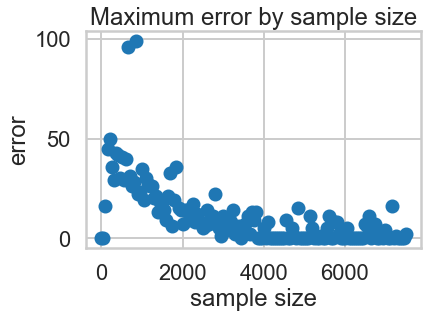

In [267]:
plt.scatter(x=binData.samplesize, y = binData.error)
plt.xlabel('sample size')
plt.ylabel('error')
plt.title('Maximum error by sample size')

In [268]:
binData.error = binData.error.replace(0, np.nan)

Text(0.5, 1.0, 'Maximum error by sample size')

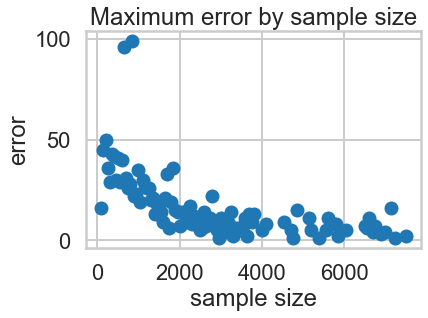

In [269]:
plt.scatter(x=binData.samplesize, y = binData.error)
plt.xlabel('sample size')
plt.ylabel('error')
plt.title('Maximum error by sample size')

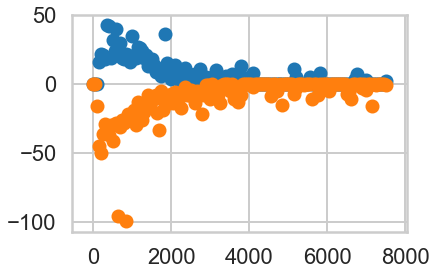

In [270]:
plt.scatter(x = binData.samplesize, y = binData.pos_bias)
plt.scatter(x = binData.samplesize, y = binData.neg_bias)

In [271]:
binData.pos_bias = binData.pos_bias.replace(0, np.nan)
binData.neg_bias = binData.neg_bias.replace(0, np.nan)

Text(0.5, 1.0, 'Maximum bias by sample size')

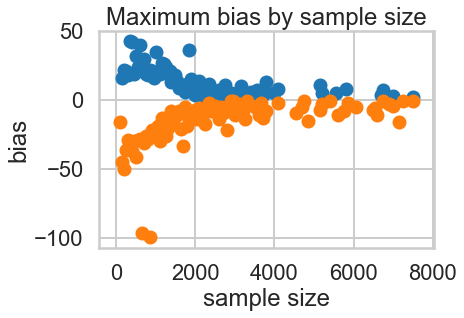

In [272]:
plt.scatter(x = binData.samplesize, y = binData.pos_bias)
plt.scatter(x = binData.samplesize, y = binData.neg_bias)
plt.xlabel('sample size')
plt.ylabel('bias')
plt.title('Maximum bias by sample size')

In [273]:
errorData = binData[['samplesize', 'error', 'pollster', 'state', 'type_simple', 'partisan_race']]

In [274]:
errorData

,samplesize,error,pollster,state,type_simple,partisan_race
0,0,NaN,,,,0
1,50,NaN,,,,0
2,100,16.0,Monmouth University,WV,House-G,0
3,150,45.0,Fort Hays State University,KS,Pres-P,0
4,200,50.0,Dan Jones & Associates,UT,Pres-P,0
...,...,...,...,...,...,...
146,7300,NaN,,,,0
147,7350,NaN,,,,0
148,7400,NaN,,,,0
149,7450,NaN,,,,0


In [275]:
errorData = errorData[errorData['samplesize'] <= 4000]

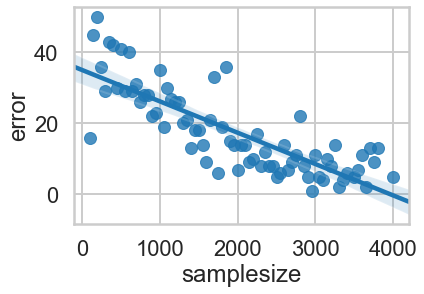

In [185]:
sns.regplot(y="error", x="samplesize", data=errorData, fit_reg = True)

In [190]:
error_size = ols('error ~ samplesize', errorData).fit()
print(error_size.summary())

                            OLS Regression Results                            
Dep. Variable:                  error   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           8.91e-19
Time:                        14:58:07   Log-Likelihood:                -251.80
No. Observations:                  75   AIC:                             507.6
Df Residuals:                      73   BIC:                             512.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.0776      1.666     21.051      0.0

In [191]:
errorData['residuals'] = (errorData['error'] - error_size.predict(errorData['samplesize']))

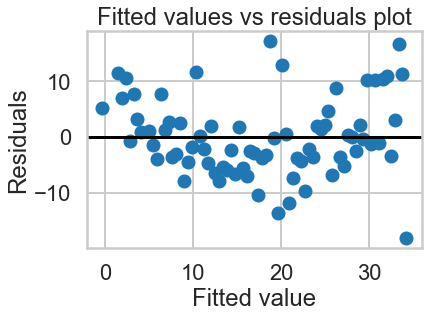

In [192]:
plt.scatter(y = errorData.residuals, x = error_size.predict(errorData.samplesize))
plt.xlabel('Fitted value')
plt.ylabel('Residuals')
plt.title('Fitted values vs residuals plot')
plt.axhline(0, c = 'black')

In [193]:
errorData['logfit'] = np.log(errorData['error'])

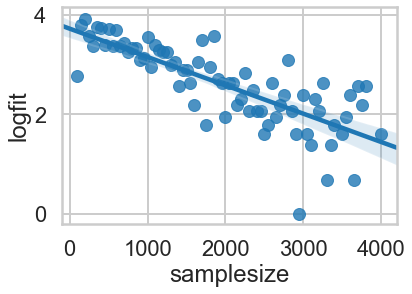

In [194]:
sns.regplot(y="logfit", x="samplesize", data=errorData, fit_reg = True)

In [195]:
log_error_size = ols('logfit ~ samplesize', errorData).fit()
print(log_error_size.summary())

                            OLS Regression Results                            
Dep. Variable:                 logfit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     114.0
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           1.46e-16
Time:                        14:58:17   Log-Likelihood:                -54.234
No. Observations:                  75   AIC:                             112.5
Df Residuals:                      73   BIC:                             117.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7240      0.120     31.138      0.0

In [196]:
errorData['log_residuals'] = (errorData['logfit'] - log_error_size.predict(errorData['samplesize']))

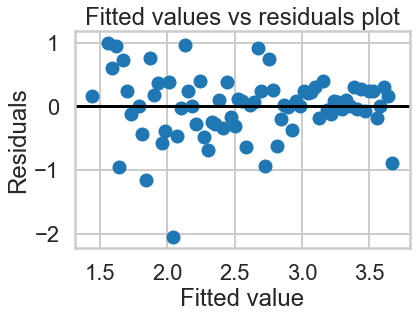

In [198]:
plt.scatter(y = errorData.log_residuals, x = log_error_size.predict(errorData.samplesize))
plt.xlabel('Fitted value')
plt.ylabel('Residuals')
plt.title('Fitted values vs residuals plot')
plt.axhline(0, c = 'black')

In [276]:
errorData

,samplesize,error,pollster,state,type_simple,partisan_race
0,0,NaN,,,,0
1,50,NaN,,,,0
2,100,16.0,Monmouth University,WV,House-G,0
3,150,45.0,Fort Hays State University,KS,Pres-P,0
4,200,50.0,Dan Jones & Associates,UT,Pres-P,0
...,...,...,...,...,...,...
76,3800,13.0,Columbus Dispatch,OH,Pres-P,0
77,3850,NaN,,,,0
78,3900,NaN,,,,0
79,3950,NaN,,,,0


In [277]:
pollerror = allPolls.groupby('pollster').mean()
pollerror = pollerror[['error']]
pollstd = allPolls.groupby('pollster').std()
pollstd = pollstd[['error']]
pollerror.rename(columns = {'error':'pollster_error'}, inplace = True)
pollstd.rename(columns = {'error':'pollster_std'}, inplace = True)
pollerror.head()

,pollster_error
pollster,
1892 Polling,1.955000
1st Tuesday Campaigns,4.205000
20/20 Insight,8.050000
A&A Research,10.100000
ABC News/Washington Post,2.817846


In [278]:
pollstd.head()

,pollster_std
pollster,
1892 Polling,1.916259
1st Tuesday Campaigns,0.558614
20/20 Insight,10.521565
A&A Research,NaN
ABC News/Washington Post,2.234791


In [279]:
multimodel = errorData.merge(pollerror, how = 'left', left_on = 'pollster', right_on = 'pollster')

In [280]:
multimodel = multimodel.merge(pollstd, how = 'left', left_on = 'pollster', right_on = 'pollster')

In [281]:
multimodel

,samplesize,error,pollster,state,type_simple,partisan_race,pollster_error,pollster_std
0,0,NaN,,,,0,NaN,NaN
1,50,NaN,,,,0,NaN,NaN
2,100,16.0,Monmouth University,WV,House-G,0,5.319000,4.539484
3,150,45.0,Fort Hays State University,KS,Pres-P,0,19.118571,18.636884
4,200,50.0,Dan Jones & Associates,UT,Pres-P,0,8.243404,9.400479
...,...,...,...,...,...,...,...,...
76,3800,13.0,Columbus Dispatch,OH,Pres-P,0,4.896500,4.482473
77,3850,NaN,,,,0,NaN,NaN
78,3900,NaN,,,,0,NaN,NaN
79,3950,NaN,,,,0,NaN,NaN


In [282]:
error_pollster = ols('error ~ samplesize+pollster_std', multimodel).fit()
print(error_pollster.summary())

                            OLS Regression Results                            
Dep. Variable:                  error   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     285.2
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           1.16e-34
Time:                        15:09:34   Log-Likelihood:                -235.51
No. Observations:                  74   AIC:                             477.0
Df Residuals:                      71   BIC:                             483.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       23.4695      1.738     13.504   

In [283]:
multimodel['pollster_std']
errorData['samplesize']

0        0
1       50
2      100
3      150
4      200
      ... 
76    3800
77    3850
78    3900
79    3950
80    4000
Name: samplesize, Length: 81, dtype: int32

In [284]:
#Goal: Run error_pollster.predict with multimodel['samplesize'] and multimodel['pollster_std']

In [285]:
multimodel.dropna(inplace = True)

In [208]:
x = multimodel[['samplesize', 'pollster_std']]
y = multimodel['error']

In [209]:
size_std_model = sm.OLS(y, x).fit()

In [210]:
multimodel['size_std_pred'] = size_std_model.predict()

In [211]:
print(size_std_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  error   R-squared (uncentered):                   0.836
Model:                            OLS   Adj. R-squared (uncentered):              0.832
Method:                 Least Squares   F-statistic:                              184.0
Date:                Sun, 01 Mar 2020   Prob (F-statistic):                    5.02e-29
Time:                        14:59:16   Log-Likelihood:                         -265.11
No. Observations:                  74   AIC:                                      534.2
Df Residuals:                      72   BIC:                                      538.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [212]:
multimodel['size_std_reg'] = multimodel['error'] - multimodel['size_std_pred']

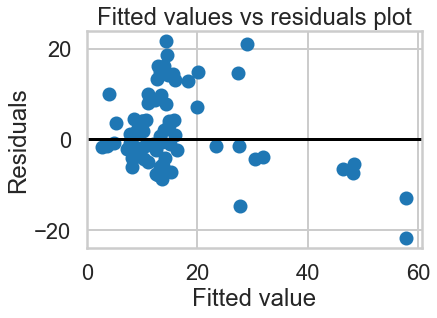

In [213]:
plt.scatter(y = multimodel.size_std_reg, x = multimodel.size_std_pred)
plt.xlabel('Fitted value')
plt.ylabel('Residuals')
plt.title('Fitted values vs residuals plot')
plt.axhline(0, c = 'black')

In [286]:
multimodel['log_error'] = np.log(multimodel['error'])

In [215]:
x = multimodel[['samplesize', 'pollster_std']]
y = multimodel['log_error']

In [216]:
size_log_model = sm.OLS(y, x).fit()

In [217]:
multimodel['size_log_pred'] = size_log_model.predict()

In [218]:
print(size_log_model.summary())

                                 OLS Regression Results                                
Dep. Variable:              log_error   R-squared (uncentered):                   0.863
Model:                            OLS   Adj. R-squared (uncentered):              0.859
Method:                 Least Squares   F-statistic:                              226.2
Date:                Sun, 01 Mar 2020   Prob (F-statistic):                    9.06e-32
Time:                        15:02:11   Log-Likelihood:                         -106.03
No. Observations:                  74   AIC:                                      216.1
Df Residuals:                      72   BIC:                                      220.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [219]:
multimodel['size_log_reg'] = multimodel['log_error'] - multimodel['size_log_pred']

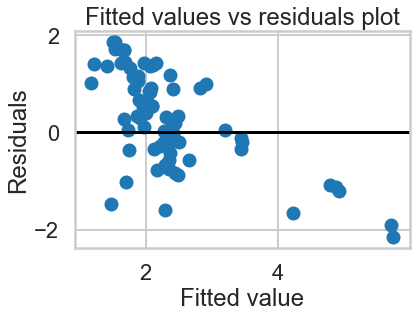

In [220]:
plt.scatter(y = multimodel.size_log_reg, x = multimodel.size_log_pred)
plt.xlabel('Fitted value')
plt.ylabel('Residuals')
plt.title('Fitted values vs residuals plot')
plt.axhline(0, c = 'black')

In [287]:
x = multimodel[['samplesize', 'pollster_std', 'partisan_race']]
y = multimodel['log_error']

In [289]:
size_std_partisan_model = sm.OLS(y, x).fit()

In [290]:
multimodel['size_std_partisan_model_pred'] = size_std_partisan_model.predict()

In [291]:
print(size_std_partisan_model.summary())

                                 OLS Regression Results                                
Dep. Variable:              log_error   R-squared (uncentered):                   0.726
Model:                            OLS   Adj. R-squared (uncentered):              0.718
Method:                 Least Squares   F-statistic:                              95.22
Date:                Sun, 01 Mar 2020   Prob (F-statistic):                    6.02e-21
Time:                        15:10:41   Log-Likelihood:                         -132.92
No. Observations:                  74   AIC:                                      269.8
Df Residuals:                      72   BIC:                                      274.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\marcu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\marcu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\marcu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [295]:
print(size_std_partisan_model.rsquared_adj)

0.7180223005754567


In [298]:
print(size_std_partisan_model.fvalue)

95.21605033131749


In [292]:
multimodel['size_std_partisan_model_reg'] = multimodel['log_error'] - multimodel['size_std_partisan_model_pred']

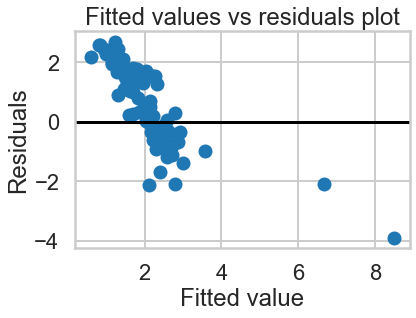

In [294]:
plt.scatter(y = multimodel.size_std_partisan_model_reg, x = multimodel.size_std_partisan_model_pred)
plt.xlabel('Fitted value')
plt.ylabel('Residuals')
plt.title('Fitted values vs residuals plot')
plt.axhline(0, c = 'black')